# Atividade: MLP e KNN


> Esta atividade tem como objetivo aplicar algoritmos de aprendizado supervisionado no contexto de Machine Learning, utilizando algoritmos com objetivo de classificação. Para esse propósito, utilizaremos o K-Nearest Neighbors (KNN) e uma rede neural MultiLayer Perceptron (MLP).

> Os experimentos foram realizados sobre a base de dados Cardiovascular Disease, uma base de dados real que contém atributos relacionados a condições cardiovasculares. Alinhado ao propósito da atividade, de aplicar algoritmos de classificação, nesta base o objetivo será classificar se a amostra (pessoa) analisada possui ou não uma doença cardiovascular.

> Foram utilizadas técnicas de validação cruzada para avaliar o desempenho dos modelos, com foco em métricas como acurácia, precisão, recall e F1-score.

> A proposta busca comparar a eficácia de cada algoritmo, analisando suas características, desempenho e adequação ao problema em questão.




## Grupo

- **Bruno Tasso Savoia - 22000354**
- **Luigi Mazzoni Targa - 23010918**
- **Marcela Franco - 23013238**
- **Nicole Silvestrini Garrio - 23009486**
- **Vitor Hugo Amaro Aristides - 20018040**

# Bibliotecas necessárias

Para esse projeto, desenvolvido em Python no Google Colab, utilizamos diversas bibliotecas que nos ajudam a manipular dados, visualizar informações e aplicar algoritmos de aprendizado de máquina. Dentre todas, destaca-se a biblioteca scikit-learn (sklearn), que fornece uma ampla gama de ferramentas para pré-processamento, modelagem, avaliação e validação de modelos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay, make_scorer, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

# Dataset e Sumário de atributos


Para esta atividade, a proposta foi escolher uma base de dados real para aplicação das técnicas de classificação supervisionadas. Portanto, escolhemos, através de pesquisa online, o dataset 'Cardiovascular Disease', disponível no Kaggle e no OpenML.

Essa base de dados tem como objetivo coletar dados da saúde da pessoa e identificar se ela possui ou não doença cardiovascular. Especificamente, o dataset escolhido possui: 13 variáveis, sendo a última o rótulo.

São as variáveis:

- id: código de identificação
- age: idade em dias
- gender: gênero sexual (1 = feminino, 2 = masculino)
- height: altura em centímetros
- weight: peso em quilogramas
- ap_hi: pressão alterial sistólica
- ap_lo: pressão alterial diastólica
- cholesterol: colesterol -
  - 1: normal,
  - 2: acima do normal,
  - 3: muito acima do normal.
- gluc: glicose -
  - 1: normal,
  - 2: acima do normal,
  - 3: muito acima do normal.
- smoke: fumante (0 = não, 1 = sim)
- alco: consumo de álcool (0 = não, 1 = sim)
- active: prática de atividades físicas (0 = não, 1 = sim)
- cardio: presença de doença cardiovascular (0 = sem doença, 1 = com doença) -> variável alvo (target)

O dataset está disponível no link:

```
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
ou
https://www.openml.org/search?type=data&status=active&qualities.NumberOfClasses=%3D_2&id=45547
```



# EDA (Análise Exploratória dos Dados)

## Lendo o dataset e criando o dataframe para manipulação

Neste primeiro passo, importamos o arquivo CSV com os dados do dataset escolhido e armazenamos seu conteúdo em um DataFrame. Em seguida, exibimos as cinco primeiras linhas para verificar se os dados foram carregados corretamente.

In [ ]:
df_EDA = pd.read_csv('/content/cardio_train.csv', sep=';')
df_EDA.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Para melhor leitura, renomeamos a nossa variável alvo 'cardio' por 'disease' para representar melhor a presença (1) ou ausência (0) da doença cardiovascular.

In [ ]:
df_EDA.rename(columns={'cardio': 'disease'}, inplace=True)

Como foi requerido no enunciado específico da atividade, em questões de formato, a base de dados escolhida deve:
- Conter pelo menos 8 atributos/características e ao menos 1 variável alvo
- Conter pelo menos 5.000 entradas únicas.

In [ ]:
print("Número de entradas (amostras): ",df_EDA.shape[0])
duplicadas = df_EDA.duplicated().sum()
print(f"Entradas duplicadas: {duplicadas}")

Número de entradas (amostras):  70000
Entradas duplicadas: 0


> Vemos que a base possui zero entradas duplicadas, portanto todas as 70.000 entradas são únicas.

In [ ]:
print("Número de características (contando a variável target): ",df_EDA.shape[1])

Número de características (contando a variável target):  13


> Vemos que a base possui 13 variáveis, e sabemos que a última é a variável alvo.

Portanto, a base de dados escolhida atende aos requisitos impostos.

### Verificando o balanceamento da base e número de doentes

Analisamos o balanceamento do dataset com base na coluna 'cardio', que indica a presença ou ausência da doença. Fizemos três análises: a contagem absoluta (160 não doentes e 137 doentes), o percentual (53% sem doença e 46% com doença) e, por fim, um gráfico para visualizar melhor essa distribuição.

In [ ]:
df_EDA["disease"].value_counts()

,count
disease,
0,35021
1,34979


> Temos na nossa base 70.000 amostras, sendo elas: 35.021 de pessoas sem doença e 34.979 de pessoas com doença cardiovascular.

In [ ]:
df_EDA["disease"].value_counts(normalize=True)*100

,proportion
disease,
0,50.03
1,49.97


> Em percentual é possível ver a pequena diferença de proporção entre as duas classes, sendo uma diferença de 0.06%. Portanto, o dataset pode ser considerado um dataset balanceado.
> Assim, podemos concluir que **não** utilizaremos nenhuma técnica de pré-processamento sintético como SMOTE.

Text(0.5, 1.0, 'Distribuição de Doença Cardiovascular')

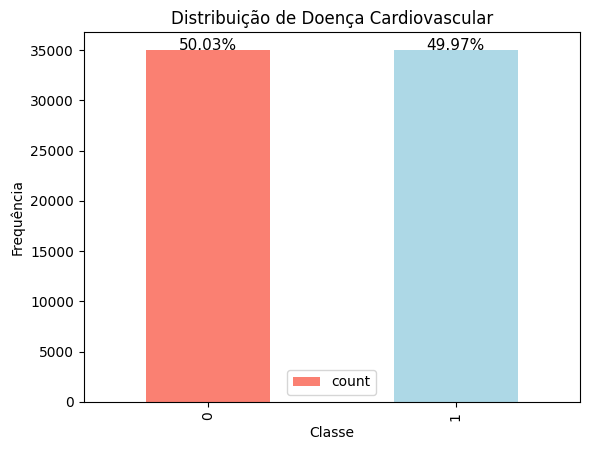

In [ ]:
ax = df_EDA["disease"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

total = len(df_EDA)
for p in ax.patches:
    height = p.get_height()
    pct = (height / total) * 100
    ax.text(p.get_x() + p.get_width()/2, height + 1, f'{pct:.2f}%', ha='center', fontsize=11)

plt.legend()
#plt.legend(['Sem doença', 'Com doença'], title='Amostra')


plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.title('Distribuição de Doença Cardiovascular')

Utilizamos df.info() para verificar se havia dados ausentes no dataset. Confirmando que não há valores nulos e que todas as colunas são do tipo numérico (int e float).

In [ ]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  disease      70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


>

Comparando numero de homens e numero de mulehres

In [ ]:
df_EDA["gender"].value_counts()

,count
gender,
1,45530
2,24470


> É possível notar que as mulheres são

In [ ]:
pd.crosstab(df_EDA["disease"], df_EDA["gender"])

gender,1,2
disease,,
0,22914,12107
1,22616,12363


> Interpretação:

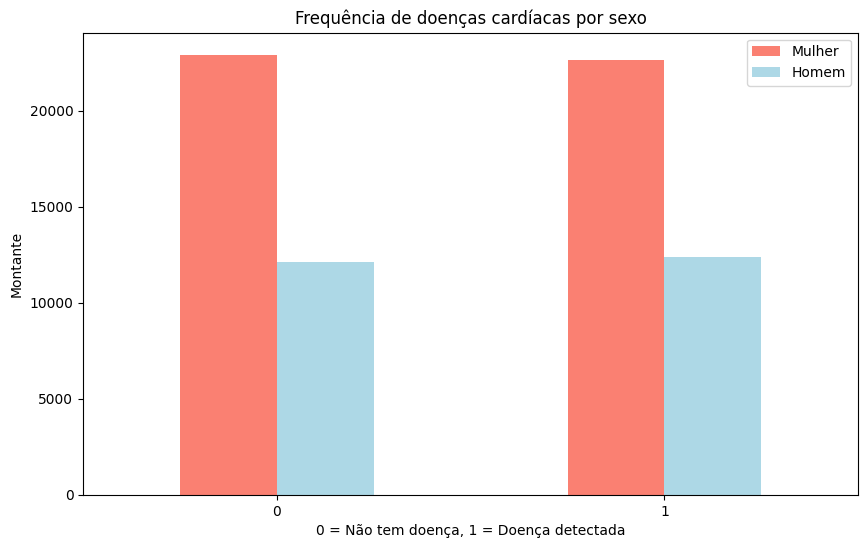

In [ ]:
pd.crosstab(df_EDA["disease"], df_EDA["gender"]).plot(kind="bar",
                                              figsize= (10,6),
                                              color=["salmon", "lightblue"])

plt.title("Frequência de doenças cardíacas por sexo")
plt.xlabel("0 = Não tem doença, 1 = Doença detectada")
plt.ylabel("Montante")
plt.legend(["Mulher", "Homem"])
plt.xticks(rotation=0);

### Análise de variáveis numéricas

Embora todas as variáveis sejam numéricas, algumas delas representam categorias — por exemplo, o gênero, onde feminino é representado por 1 e masculino por 2. Aqui, vamos analisar a distribuição das variáveis que são de natureza contínua, e não categóricas.

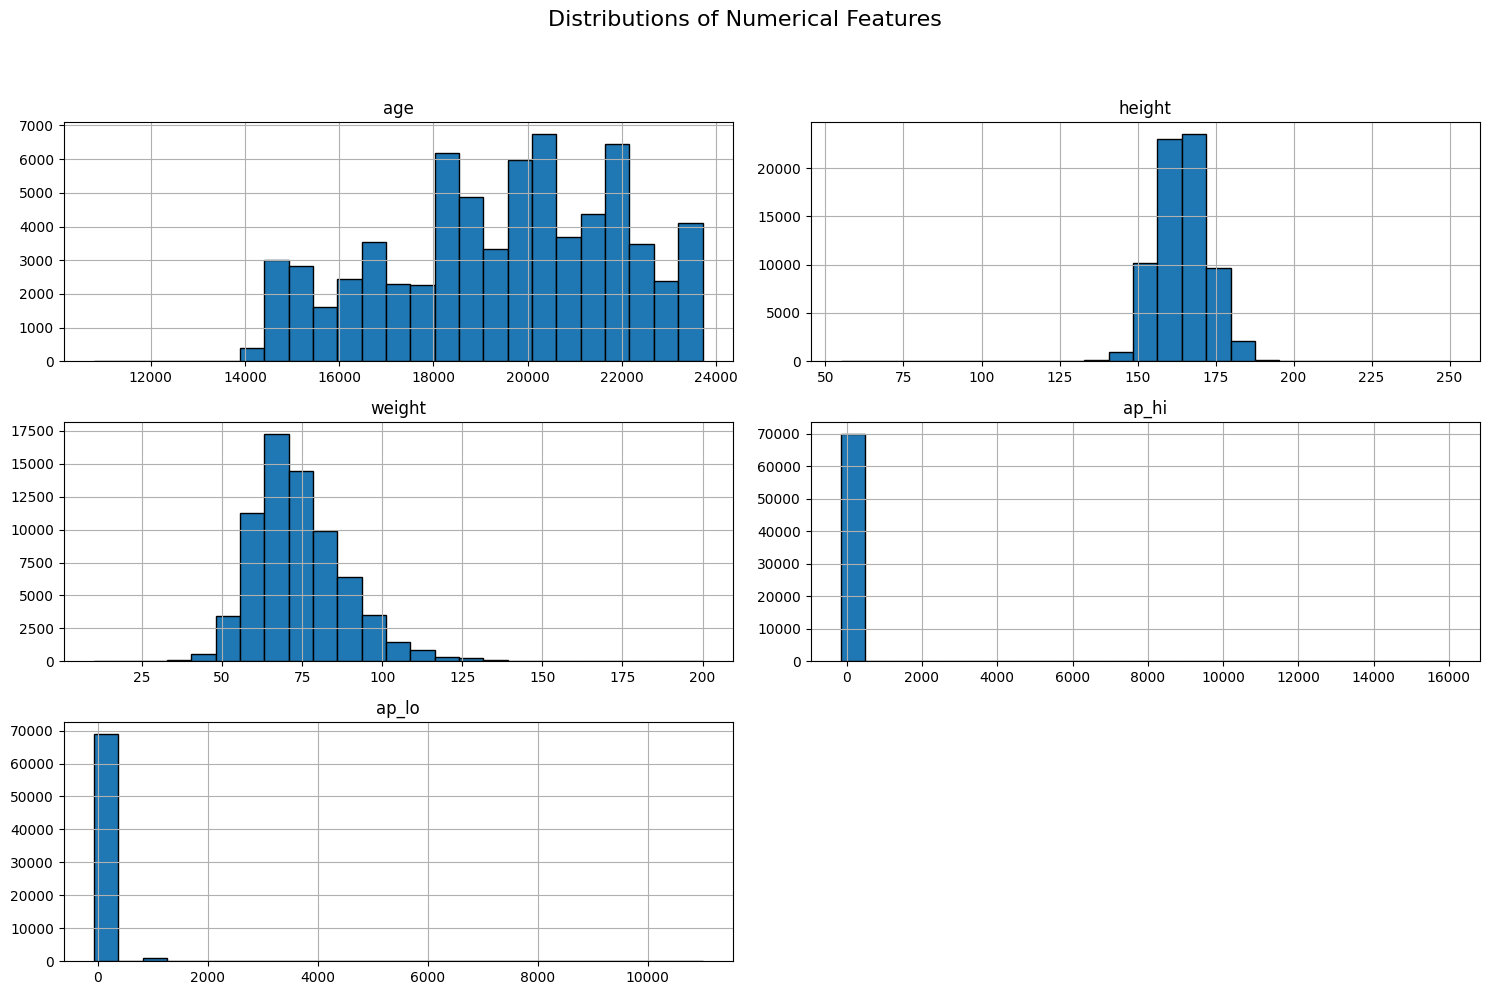

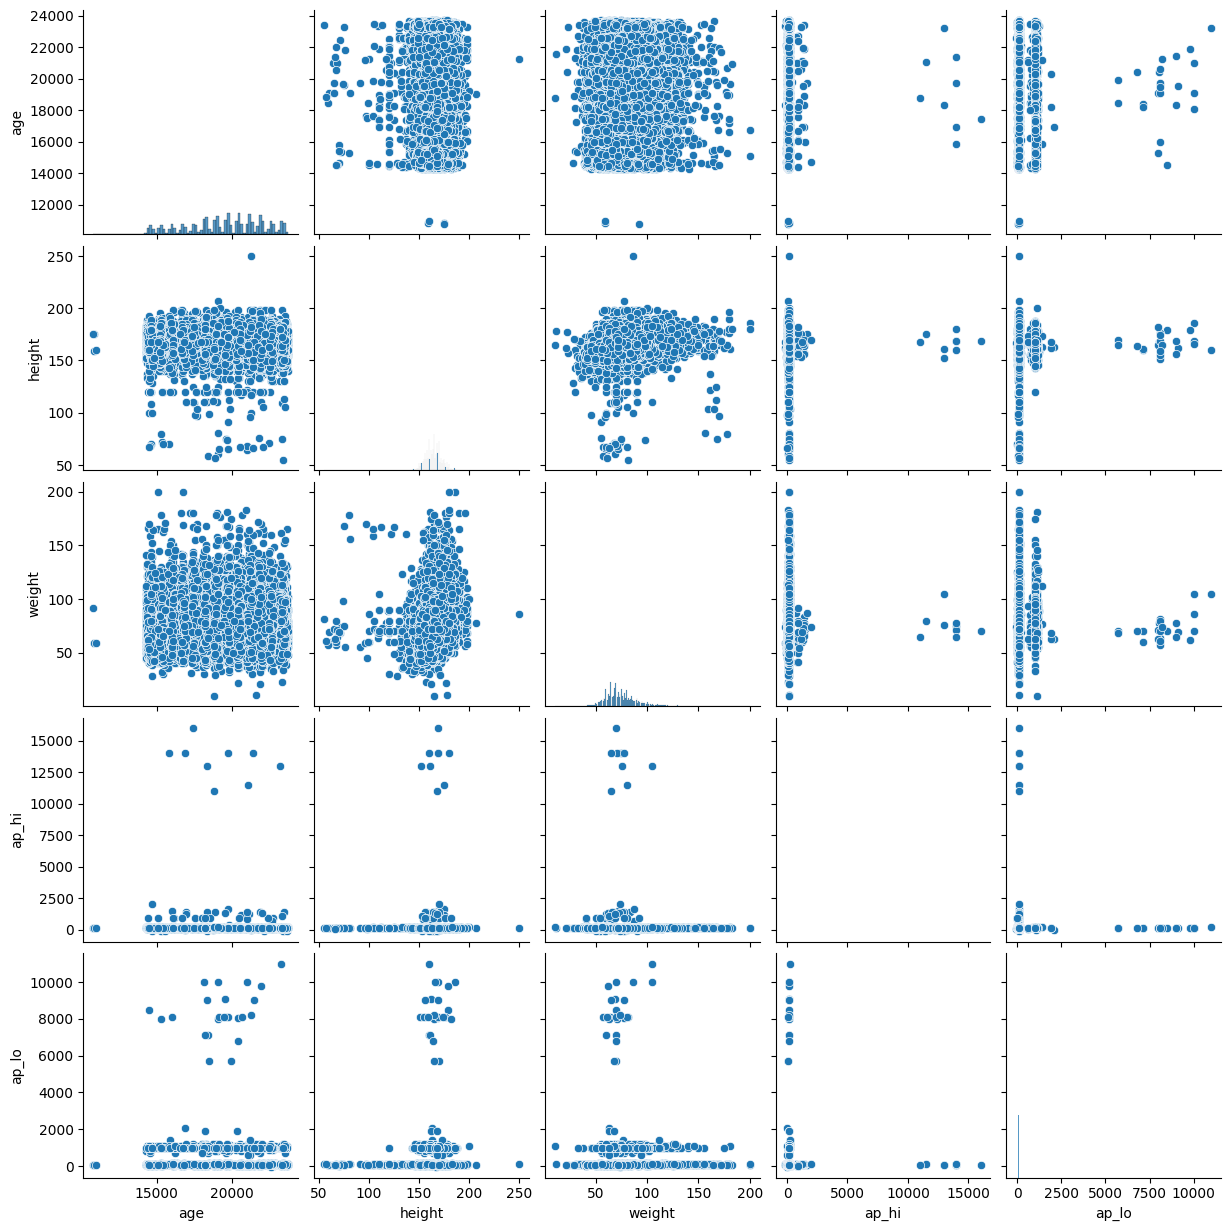

In [ ]:
variaveis_continuas = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# hist() metodu ile histogramlar
df_EDA[variaveis_continuas].hist(figsize=(15, 10), bins=25, edgecolor='black')
plt.suptitle('Distributions of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


sns.pairplot(df_EDA[variaveis_continuas])

Sabendo que

In [ ]:
df_EDA[['ap_hi','ap_lo']].describe()

,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


> É possível observar que, para a pressão alta (sistólica), existem valores discrepantes (outliers) e impossíveis, como um mínimo de -150 e um máximo de 16020. Da mesma forma, para a pressão baixa (diastólica), os valores mínimos e máximos estão fora dos limites da fisiologia humana, indicando uma entrada de dados incorreta."

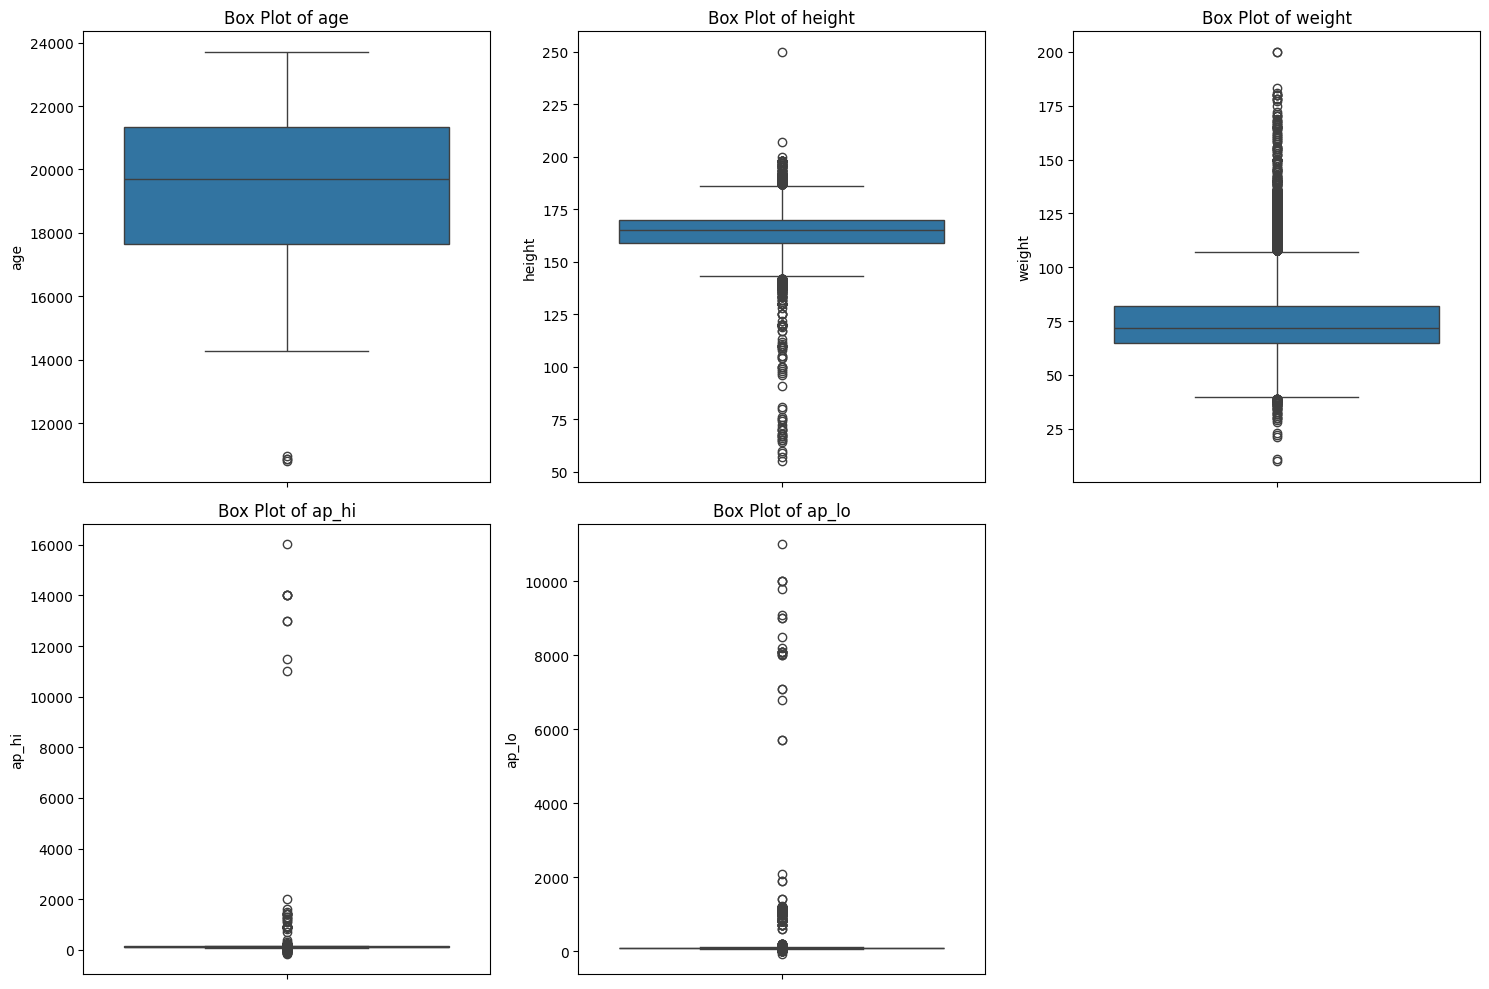

In [ ]:
variaveis_continuas = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(15, 10))
for i, col in enumerate(variaveis_continuas):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_EDA[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

outlieeeeeeeeeers

### Matriz de correlação

Também criamos uma matriz de correlação entre as variáveis numéricas (excluindo a 'cardio') para identificar relações lineares entre os atributos do dataset. Essa análise é útil para detectar variáveis altamente correlacionadas, o que pode indicar redundância ou colinearidade, além de auxiliar na seleção de atributos para modelos preditivos. A matriz foi visualizada por meio de um heatmap para facilitar a interpretação das correlações.

Coeficientes de Associação ou Correlação

TABELAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   

                ap_lo  c

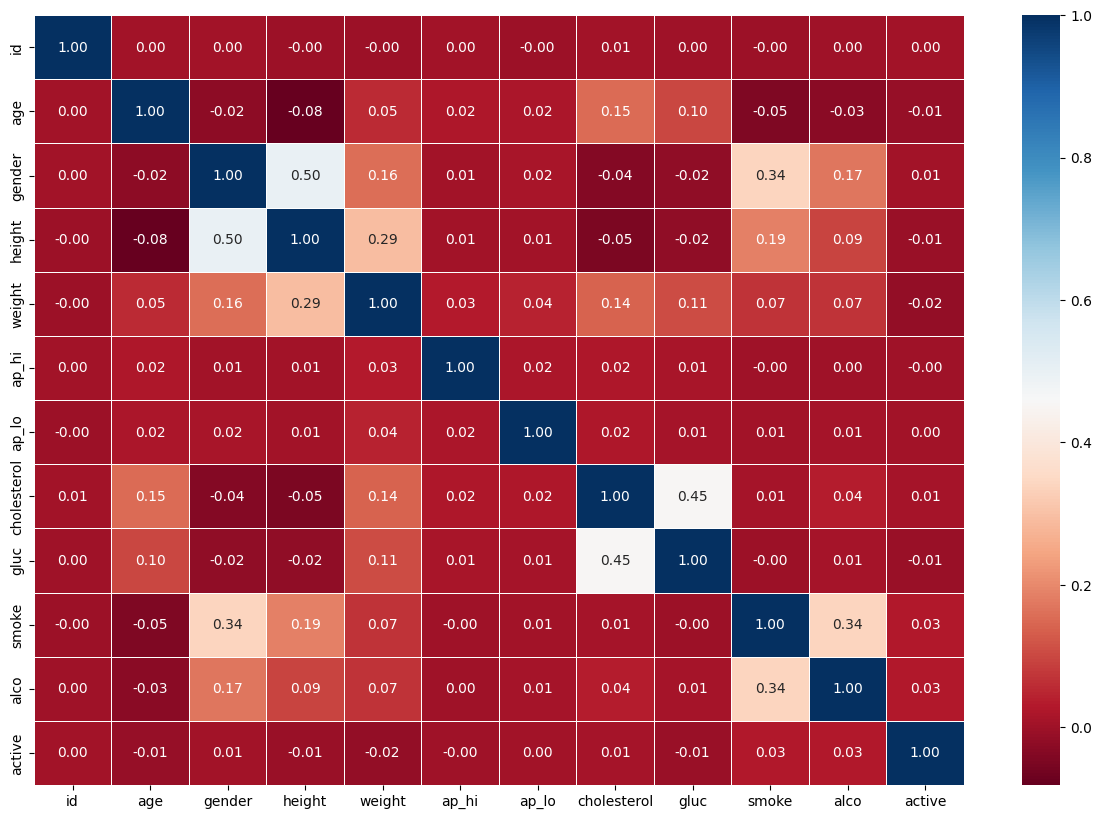

In [ ]:
corr_matrix = df_EDA.corr()
corr_matrix = df_EDA.drop('disease', axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="RdBu");

print(corr_matrix)

**Na matriz de correlação, observamos:**
- AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

**Observando o gráfico, não é possível identificar nenhuma correlação forte diretamente entre as variáveis**

### PairPlot

Geramos um pairplot para analisar a distribuição e as relações bivariadas entre as variáveis numéricas do dataset, segmentadas pela variável alvo 'cardio'. Essa visualização permite examinar a distribuição individual dessas variáveis, bem como as relações bivariadas entre elas, segmentadas pela variável alvo condition. As distribuições nas diagonais foram representadas por curvas de densidade (kde), facilitando a identificação de assimetrias e a comparação entre as classes. Esse tipo de análise ajuda a revelar padrões visuais e potenciais separações entre os grupos, o que pode ser útil na etapa de modelagem preditiva.




KeyboardInterrupt: 

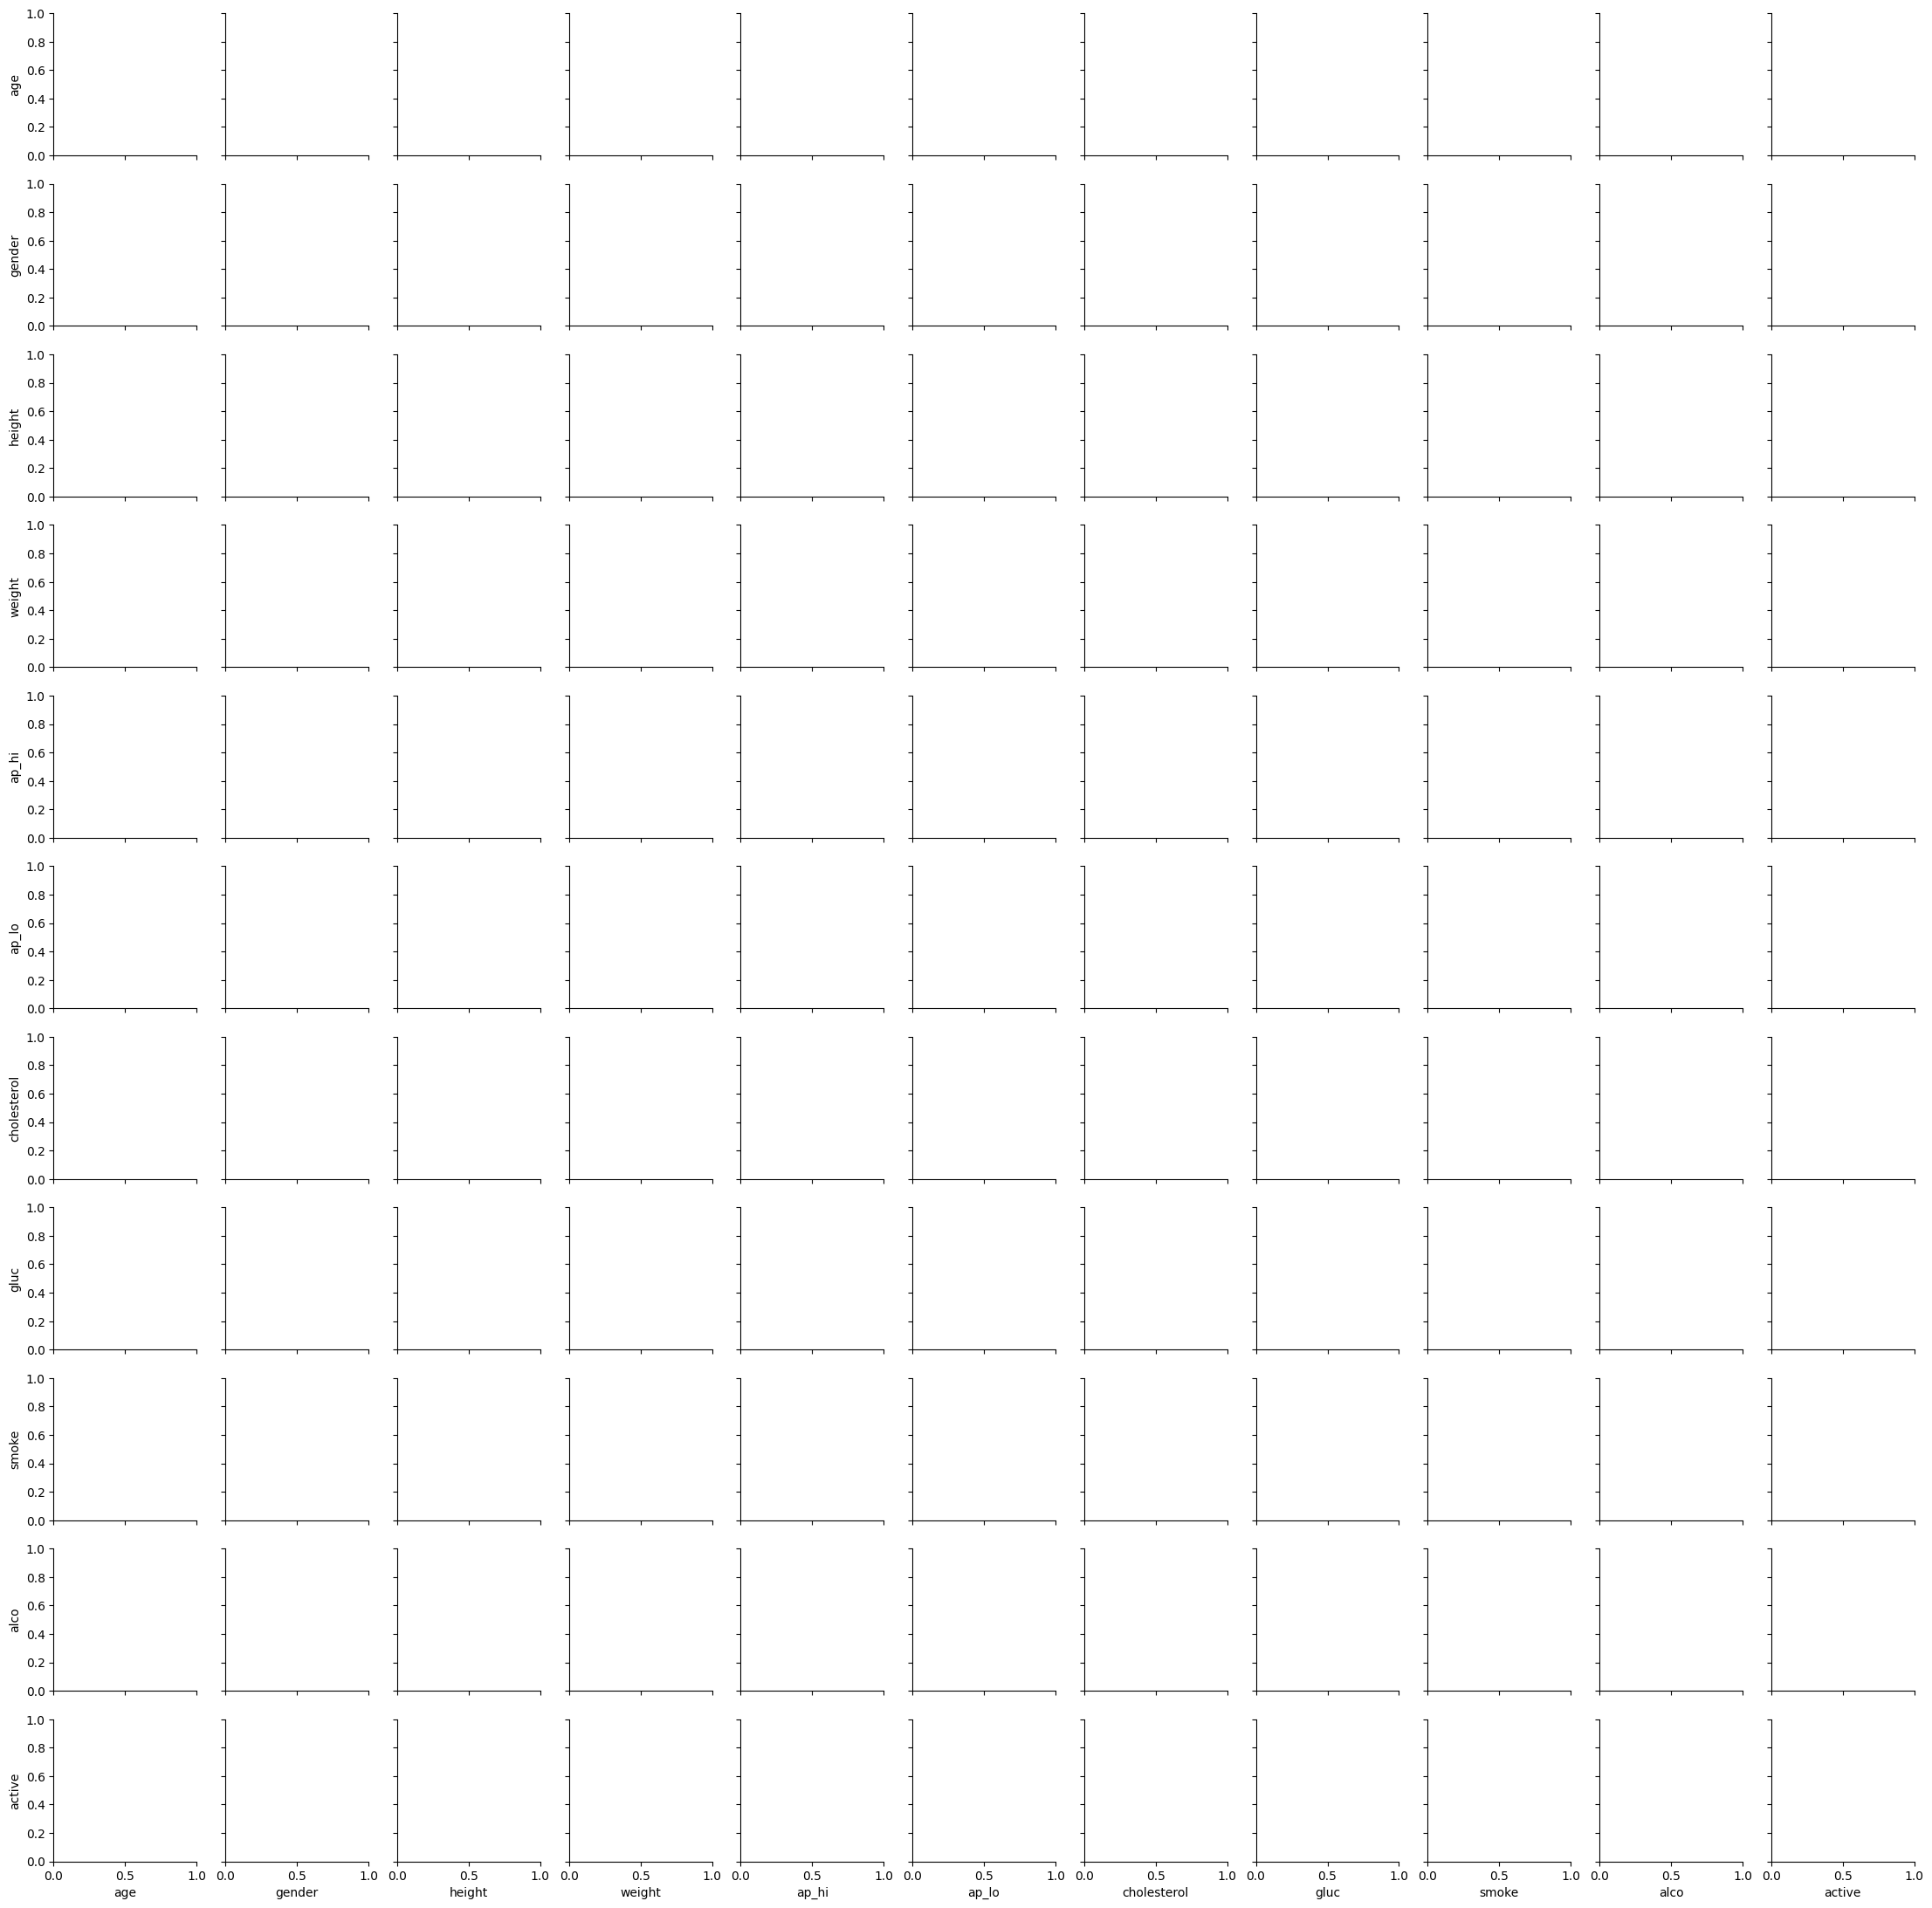

In [ ]:
cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'disease']

sns.pairplot(df_EDA[cols], hue='disease', diag_kind='kde', palette='Set1')
plt.suptitle('PAIRPLOT', y=1.02)
plt.show()

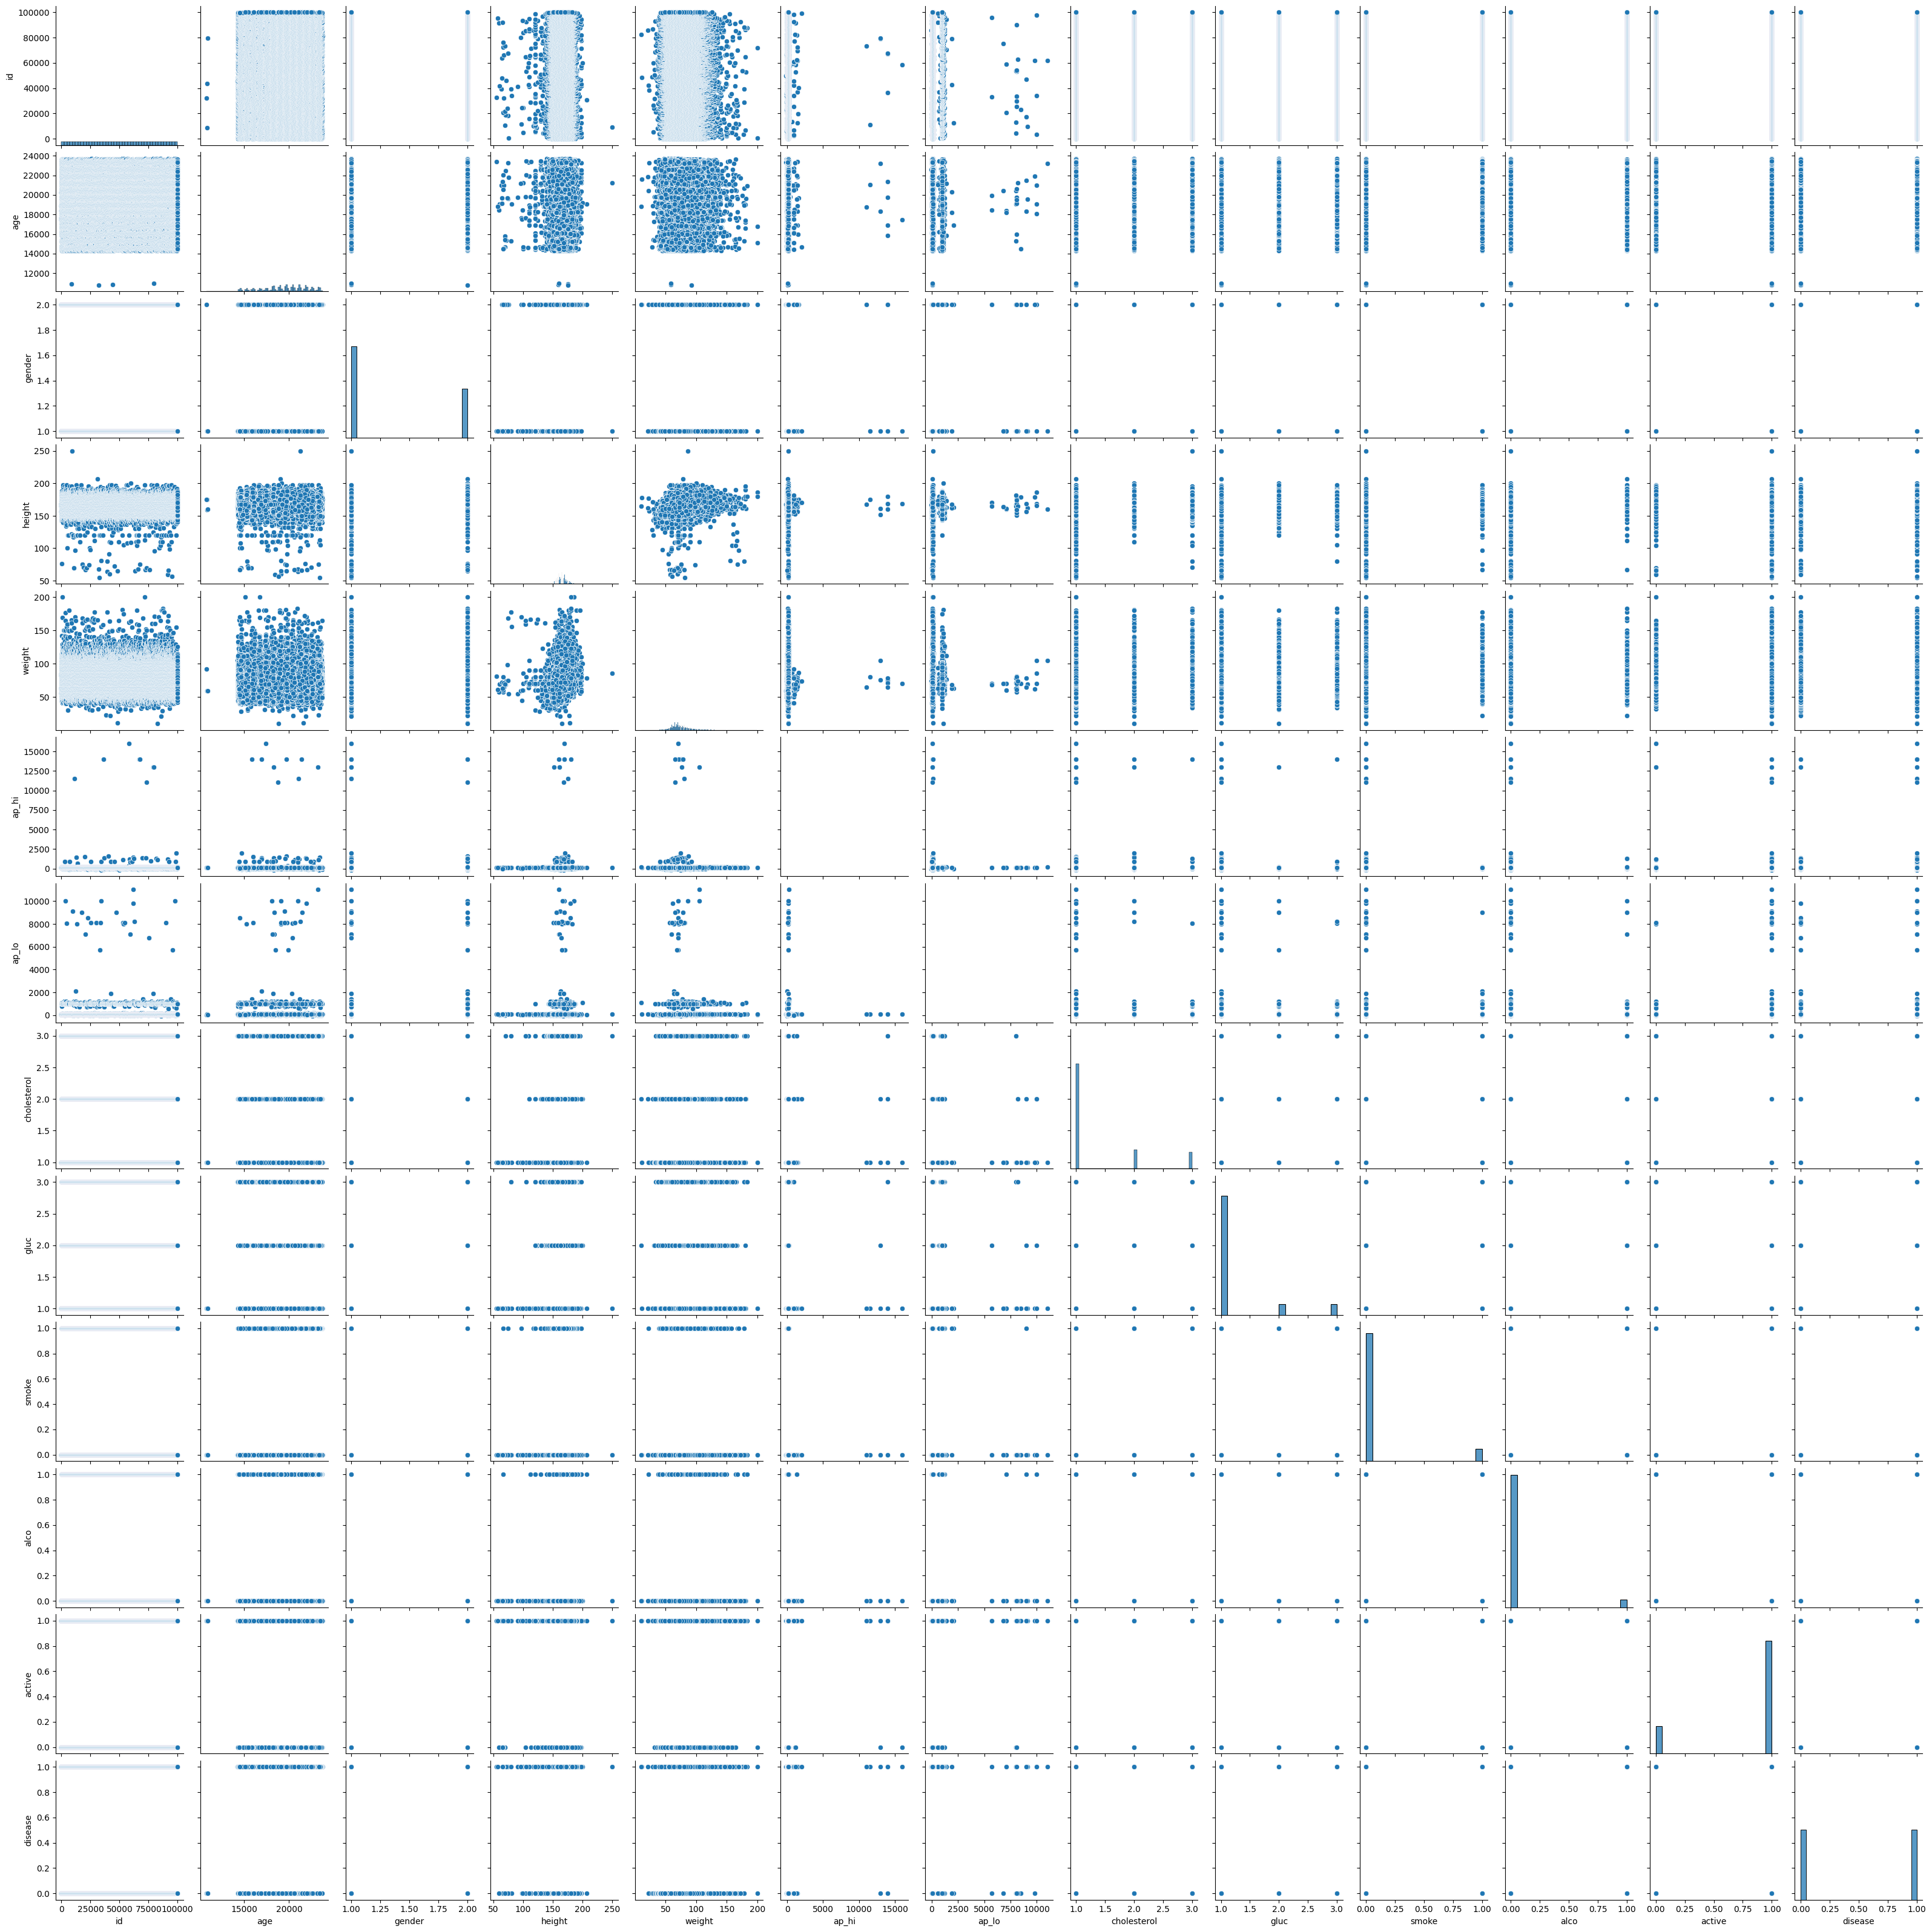

In [ ]:
# df_EDA
sns.pairplot(df_EDA)

No pairplot, conseguimos observar que:
- **oldpeak** e **thalach** são os melhores indicadores clínicos individuais da para condition, sendo:
  - o	oldpeak alto (≥ 2 mm) → grande probabilidade de condition 1, ou seja, positivo para doença.
  - o	thalach baixo (< 150 bpm) → maior chance de condition 1 (positivo para doença).
- A idade aumenta o risco, porém não basta sozinha, pois há muitos pacientes com idade entre 50 e 60 anos nos dois grupos.
- Existe uma correlação negativa entre thalach e age, ou seja a medida que a idade aumenta, a frequência máxima tende a diminuir.

### PCA

           id       age    gender    height    weight     ap_hi     ap_lo  \
PC1  0.002176 -0.017001  0.948300  0.042518  0.023634  0.000085  0.000501   
PC2  0.006135  0.001082 -0.031264 -0.002599 -0.001803  0.000037  0.000264   

     cholesterol      gluc     smoke      alco    active  
PC1    -0.048937 -0.030077  0.281707  0.121727  0.024319  
PC2     0.072933  0.033361  0.026060  0.023200  0.995653  


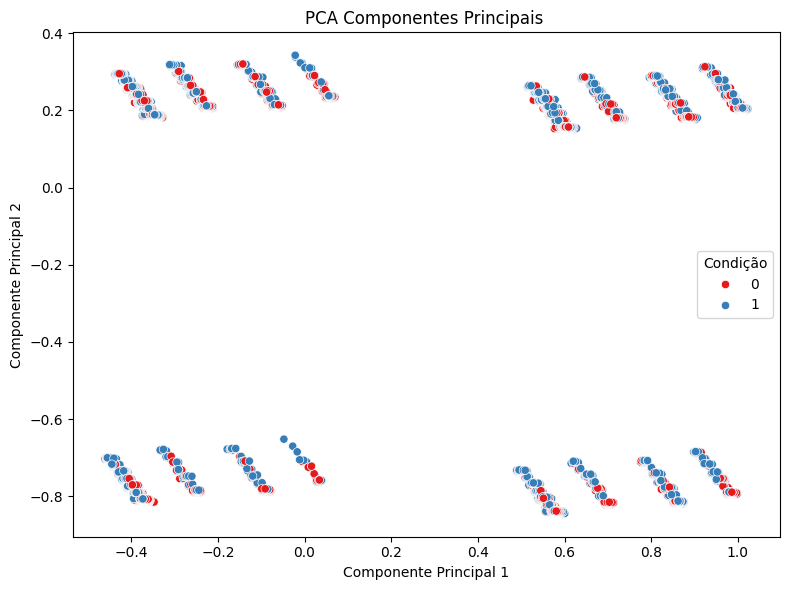

In [ ]:
from sklearn.decomposition import PCA

features = df_EDA.drop('disease', axis=1)

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

print(pd.DataFrame(pca.components_, columns=features.columns, index=['PC1', 'PC2']))

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['disease'] = df_EDA['disease']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='disease', palette='Set1')
plt.title('PCA Componentes Principais ')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Condição')
plt.tight_layout()
plt.show()


# Pré-processamento dos dados

aaaaaasadsadasdas

Após upload do dataset na pasta do notebook, usamos pandas para ler o arquivo csv e carregar seu conteúdo em um dataframe (df1).

In [ ]:
df = pd.read_csv('/content/cardio_train.csv', sep=';')
df.rename(columns={'cardio': 'disease'}, inplace=True)

#df1.head()

## Engenharia de Variáveis

Após a análise exploratória dos dados, é possível concluir que a variável 'id' não influencia em nada, ela é simplesmente um código identificador da amostra, portanto pode ser removida.

In [ ]:
df.drop('id', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  disease      70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


> Aqui é possível ver que a coluna 'id' foi removida, restando apenas 12 colunas.

A variável 'idade' também foi fornecida em dias, o que não é conveniente para nós que usamos a idade em anos. Portanto, converteremos de dias para anos.

In [ ]:
df['age'] = (df['age'] / 365).astype(int)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


> Aqui é possível ver que a coluna idade (age) agora está em **ANOS**.

## Limpeza de dados


Como foi observado, a base de dados possui outliers.


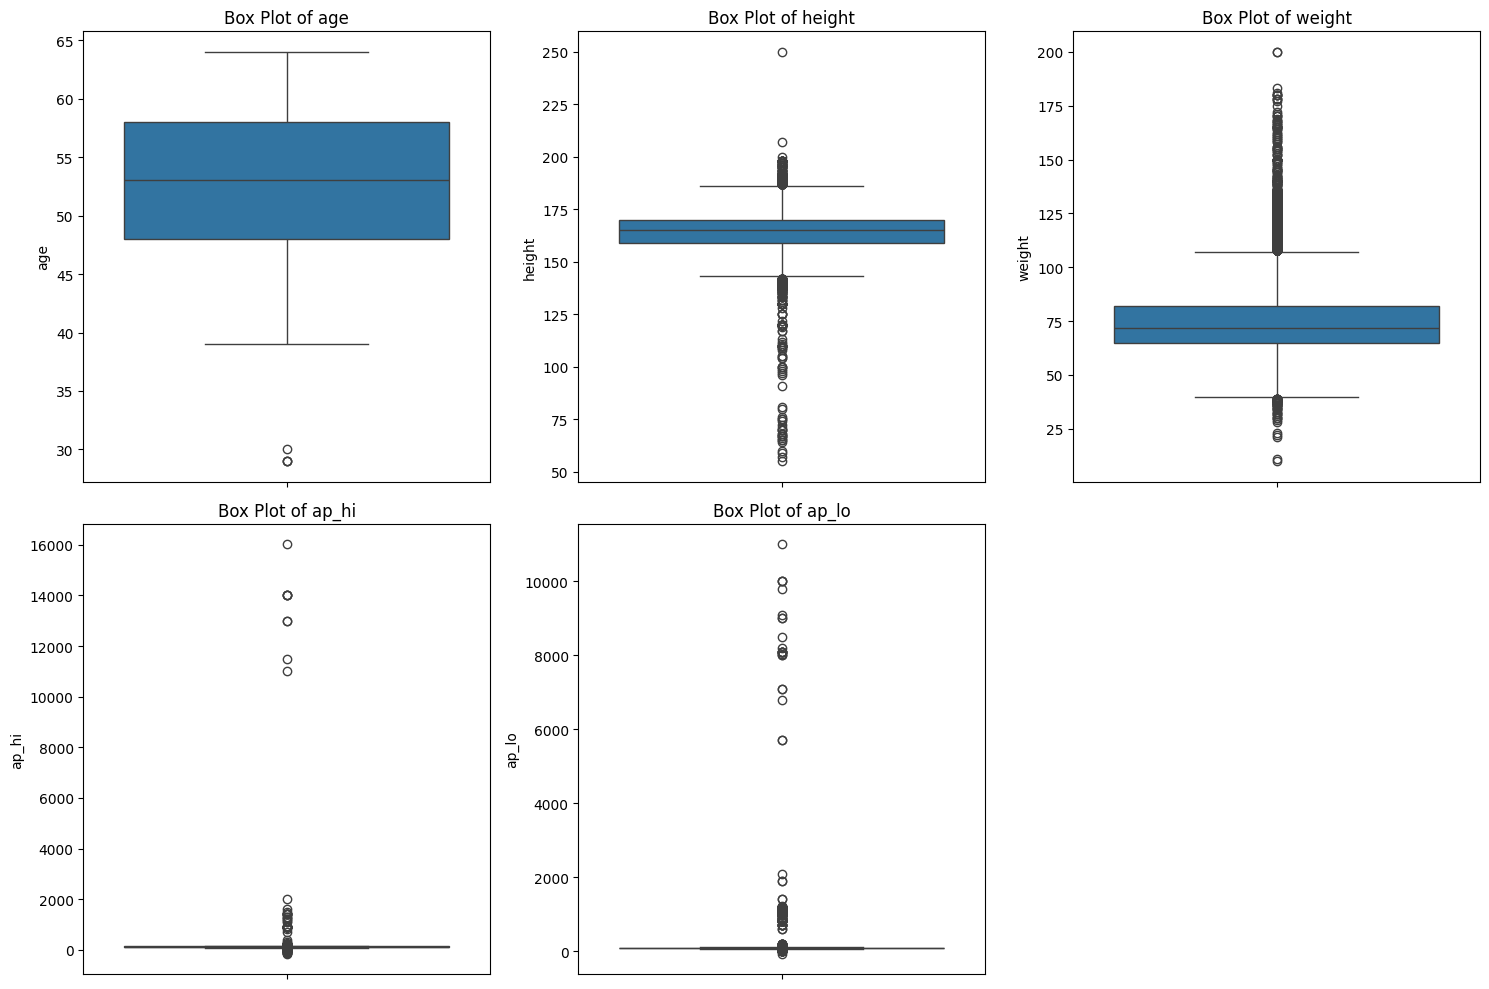

In [ ]:
variaveis_continuas = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(15, 10))
for i, col in enumerate(variaveis_continuas):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Vamos remover esses outliers usando IQR.

In [ ]:
variaveis_continuas = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for col in variaveis_continuas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - (1.5 * IQR)
    limite_superior = Q3 + (1.5 * IQR)

    # Processo de filtragem dos valores fora dos limites inferior e superior
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    print(f"Tamanho do conjunto de dados após a limpeza de {col}: {df.shape}")

# Além disso, vamos aplicar novamente a regra fisiológica para os valores de pressão
# (ap_hi deve ser maior que ap_lo; a pressão baixa não pode ser maior que a alta)
df = df[df['ap_hi'] > df['ap_lo']]
print("Tamanho do conjunto de dados após o controle 'ap_hi > ap_lo':", df.shape)

Tamanho do conjunto de dados após a limpeza de age: (69996, 12)
Tamanho do conjunto de dados após a limpeza de height: (69477, 12)
Tamanho do conjunto de dados após a limpeza de weight: (67719, 12)
Tamanho do conjunto de dados após a limpeza de ap_hi: (66410, 12)
Tamanho do conjunto de dados após a limpeza de ap_lo: (62502, 12)
Tamanho do conjunto de dados após o controle 'ap_hi > ap_lo': (62499, 12)


In [ ]:
variaveis_continuas = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# p guardar
filtros_geral = pd.Series([True] * len(df), index=df.index)
remocoes_por_variavel = {}

for col in variaveis_continuas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - (1.5 * IQR)
    limite_superior = Q3 + (1.5 * IQR)

    filtro_col = (df[col] >= limite_inferior) & (df[col] <= limite_superior)
    removidos = (~filtro_col).sum()
    remocoes_por_variavel[col] = removidos

    # att filtro
    filtros_geral &= filtro_col

# aplica o filtro no próprio df
df = df[filtros_geral]
print(f"\nTamanho após remoção total de outliers (IQR): {df.shape}")

# qts dados foram removidos por variavel
print("\nAmostras removidas por variável (IQR):")
for var, qtd in remocoes_por_variavel.items():
    print(f" - {var}: {qtd} removidas")

# regrinha de fisiologia afs
df = df[df['ap_hi'] > df['ap_lo']]
print(f"\nTamanho após aplicar regra 'ap_hi > ap_lo': {df.shape}")




Tamanho após remoção total de outliers (IQR): (62502, 12)

Amostras removidas por variável (IQR):
 - age: 4 removidas
 - height: 519 removidas
 - weight: 1819 removidas
 - ap_hi: 1435 removidas
 - ap_lo: 4632 removidas

Tamanho após aplicar regra 'ap_hi > ap_lo': (62499, 12)


Observar boxplot pós-remoção de outliers com IQR

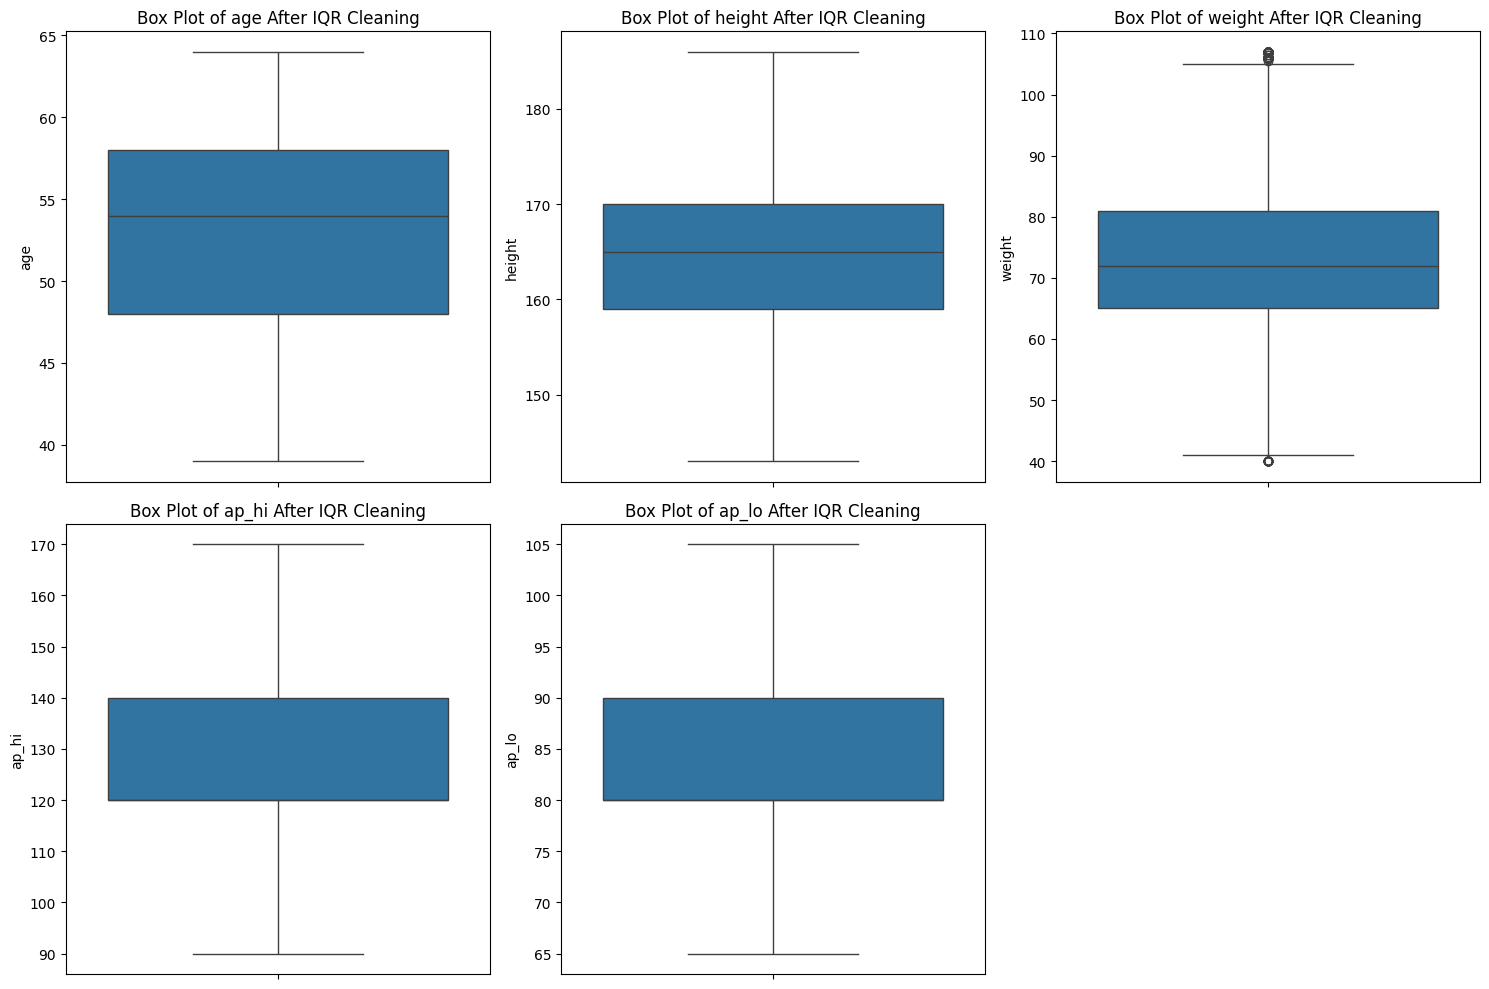

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(variaveis_continuas):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} After IQR Cleaning')
plt.tight_layout()
plt.show()

sasasasa

### Remoção de Outliers

aaaa

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
count,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000,62499.000000
mean,52.909167,1.348550,164.405478,73.180473,126.421847,81.698267,1.357734,1.220660,0.086337,0.052161,0.804333,0.493896
std,6.741340,0.476515,7.530966,12.271325,14.288637,7.672536,0.675215,0.567613,0.280864,0.222353,0.396717,0.499967
min,39.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(62499, 12)

# MODELO KNN

O algoritmo K-Nearest Neighbors (KNN), ou K Vizinhos Mais Próximos, é uma técnica de aprendizado de máquina supervisionado utilizada principalmente para tarefas de classificação e regressão. Seu funcionamento é baseado na ideia de que, para fazer uma previsão sobre um novo dado, o algoritmo procura os K exemplos mais próximos (vizinhos) no conjunto de treinamento e utiliza suas informações para determinar o resultado esperado.

No nosso estudo, utilizaremos o KNN para treinar, testar e obter a classificação de amostras do dataset escolhido.

## Criando o dataframe para manipulação

Como realizamos a engenharia de variáveis e limpeza de dados em um tópico anterior, vamos copiar o dataframe em um novo exclusivo para mexermos com o KNN.

In [ ]:
df_1 = df.copy()
df_1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,60,1,151,67.0,120,80,2,2,0,0,0,0


## Modelagem

Aqui, removemos a coluna 'cardio' do Dataframe e guardamos o restante em uma variável X. Esse 'X' representa as variáveis independentes (os atributos). E para 'y', armazenamos somente a coluna 'cardio' (nosso rótulo), logo 'y'. Assim, separamos em entrada (dados clínicos dos pacientes) = X, e saída (diagnóstico de doença cardiovascular) = y.

In [ ]:
X = df_1.drop("disease", axis= 1)
y = df_1["disease"]

Separando o conjunto original em dados de treino e dados de teste. Essa divisão é importante pois garante que o modelo aprenda APENAS com os dados de treino (X_train, y_train), e seja avaliado com dados que ele nunca viu, ou seja, o conjunto de teste (X_test, y_test) -> é essencial essa separação pois os dados de treino e teste nunca devem ser misturados.
- A proporção 0.3 significa que separamos 30% dos dados para teste, os 70% restantes serão dados de treino.
- O 'random_state' garante a reprodutibilidade, pois sempre que executamos o código a divisão será a mesma, assim podemos fazer comparações consistentes.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Aqui podemos visualizar quantos dados foram separados para cada divisão

In [ ]:
print(f"Para TREINO, temos {X_train.shape[0]} amostras COM rótulo.")
print(f"Para TESTE, temos {X_test.shape[0]} amostras SEM rótulo.")

Para TREINO, temos 49999 amostras COM rótulo.
Para TESTE, temos 12500 amostras SEM rótulo.


Com o objetivo de reduzir a dimensionalidade dos dados e preservar a maior parte da variabilidade presente no conjunto original, foi utilizada a técnica de Análise de Componentes Principais (PCA). A aplicação foi restrita ao conjunto de treino para evitar data leakage.


In [ ]:
pca = PCA(n_components=0.95, whiten=True, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Número de componentes após PCA: {pca.n_components_}")

Número de componentes após PCA: 5


Criamos um pipeline para encadear uma sequência de transformações, garantindo que todas as etapas sejam aplicadas corretamente em cada fold durante a validação cruzada, evitando o vazamento de dados.
- Normalização: como o KNN é um algoritmo que depende das distâncias entre os objetos, se os atributos tiverem escalas muito diferentes, o resultado será distorcido. Por esse motivo, foi aplicada a normalização dos dados com o 'MinMaxScaler'.
- PCA: como descrito anteriormente, tem como objetivo reduzir a dimensionalidade dos dados.
- Modelo KNN: modelo de classificação utilizado, usando a métrica de distância de Manhattan, e o peso é definido por distância, ou seja, os vizinhos mais próximos tem mais peso na votação (decisão da classe).
> A decisão de utilizar da métrica Manhattan se deve ao fato de que, apesar de nossa base de dados possuir dados contínuos, eles não são lineares ou seguem uma relação contínua simples. Já a definição do peso foi dada pelo fato de que, ao considerar o propósito da nossa base de dados, o ideal é 'dar mais peso' aos pacientes realmente mais parecidos, reduzindo a influência de pacientes muito diferentes.
> Também foram realizados testes variando os parâmetros para a métrica euclidiana e peso uniforme, mas a escolha que trouxe melhores resultados com base na análise das métricas foi utilizar a Manhattan e distância.

In [ ]:
# MANHATTAN, DISTANCIA
pipeline_KNN = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95, whiten=True, random_state=42)),
    ('knn', KNeighborsClassifier(metric='manhattan', weights='distance'))
])

In [ ]:
#MANHATTAN, UNIFORME
pipeline_KNN = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95, whiten=True, random_state=42)),
    ('knn', KNeighborsClassifier(metric='manhattan', weights='uniform'))
])

In [ ]:
#EUCLIDEAN, DISTANCIA
pipeline_KNN = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95, whiten=True, random_state=42)),
    ('knn', KNeighborsClassifier(metric='euclidean', weights='distance'))
])

In [ ]:
#EUCLIDEAN, UNIFORME
pipeline_KNN = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95, whiten=True, random_state=42)),
    ('knn', KNeighborsClassifier(metric='euclidean', weights='uniform'))
])

## Implementação com ajuste de hiperparâmetros e validação cruzada

Agora, precisamos encontrar o melhor valor para o hiperparâmetro k do algoritmo KNN. Para isso, usamos validação cruzada para identificar o desempenho de cada valor testado.

A validação cruzada foi utilizada nesse contexto para garantir que a avaliação do modelo (com diferentes valores de k) seja mais confiável e generalizável. A CV (cross validation) permite que testemos o modelo em várias divisões diferentes dos dados de treino, pois se os dados fossem simplesmente divididos em 70% e 30%, o desempenho do modelo poderia ser influenciado acidentalmente pela forma como os dados foram divididos.
Ela divide o conjunto de dados em várias partes (folds) e realiza o treinamento e do modelo várias vezes, cada vez usando uma parte diferente.


Portanto, ao testar diferentes valores para k em vários folds e também armazenando a sensibilidade obtida em cada um deles, foi possível, depois de testar todos os valores, identificar qual valor de k teve a maior sensibilidade média, portanto, nosso k ideal.
> Uma observação importante é que o valor de k ideal será ímpar, pois como o algoritmo KNN classifica a amostra a partir de uma "votação", é extremamente recomendado escolher um número ímpar para k, com a finalidade de evitar empates.

> A escolha da métrica sensibilidade (recall) para definir o melhor valor de k foi baseada na natureza do nosso problema, que envolve diagnóstico médico. Nesse contexto, é crucial minimizar falsos negativos, ou seja, garantir que pacientes com a doença sejam corretamente identificados. A sensibilidade mede exatamente isso: a proporção de verdadeiros positivos entre todos os casos positivos reais. Assim, priorizamos o valor de k que apresentou maior recall médio, pois ele indica melhor desempenho na identificação correta dos pacientes doentes.

In [ ]:
# TREINO DO MODELO
# Valores de k para testar
neighbors = range(1, 51)

# Para guardar os resultados
recall_scores = []

for k in neighbors:
    pipeline_KNN.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='recall')
    recall_scores.append(scores.mean())

melhor_k = neighbors[np.argmax(recall_scores)]

print(f"Melhor k: {melhor_k} com {max(recall_scores)*100:.2f}% de recall média")


Melhor k: 17 com 67.77% de recall média


É possível visualizar através desse gráfico a curva de desempenho do KNN (medindo a sensibilidade) no conjunto de treino (usando a validação cruzada), conforme o número de k (vizinhos/neighbors) varia de 1 a 51.

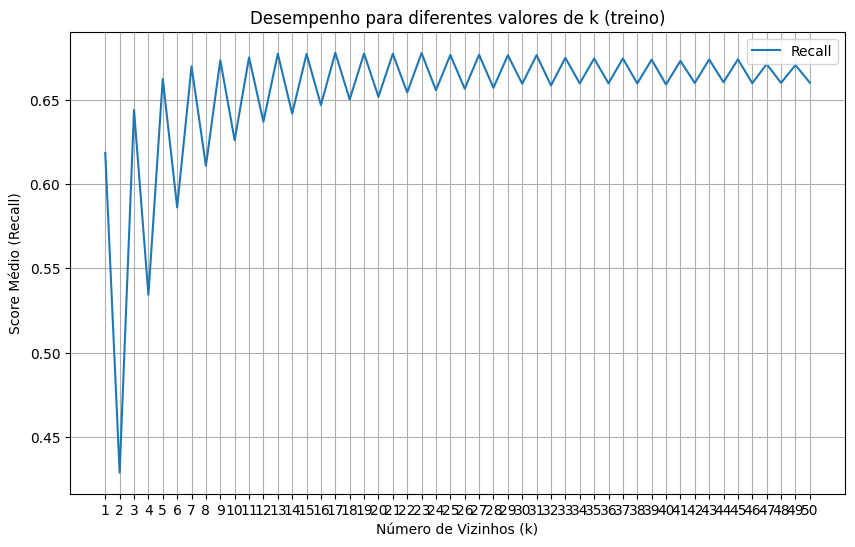

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, recall_scores, label='Recall')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Score Médio (Recall)')
plt.legend()
plt.title('Desempenho para diferentes valores de k (treino)')
plt.grid(True)

plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1))

plt.show()

Aqui, acontece o treino de fato do nosso modelo!
Após definirmos o melhor valor para k (no nosso caso, 7), vamos configurar o modelo com ele e treinar com todos os dados disponíveis do conjunto de treino.

In [ ]:
pipeline_KNN.set_params(knn__n_neighbors=melhor_k)
pipeline_KNN.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.95, random_state=42, whiten=True)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=17))])

Realizado o treino do modelo, agora será feito o teste, com dados que ele nunca viu antes, ou seja, os dados de teste. Ele retornará a classe prevista para cada amostra do teste e também a probabilidade da classe, o que será útil para métricas posteriores

In [ ]:
y_pred_test = pipeline_KNN.predict(X_test)
y_proba_test = pipeline_KNN.predict_proba(X_test)[:, 1]

# Avaliação do Modelo KNN

Em machine learning, temos diversos critérios de avaliação, com o objetivo de mensurar a eficácia e a generalização dos modelos para garantir que eles funcionem bem não apenas nos dados de treinamento, mas também em dados novos ou não vistos. Esses critérios ajudam a quantificar o desempenho do modelo em diferentes aspectos que abordaremos a seguir: Matriz de confusão, Acurácia, Precisão, Sensibilidade (Recall), Curva ROC, F1-Score.

Além disso, esses critérios auxiliam na comparação entre diferentes modelos e abordagens, orientando a escolha da melhor solução para o problema específico

Anteriormente, fizemos a implementação de KNN, um algoritmo de classificação. Nessa parte do trabalho, usaremos os critérios externos de avaliação mencionados para medir a performance do modelo aplicado e compreender sua eficácia em diferentes situações.


## Matriz de Confusão


- É uma tabela que resume o desempenho de um modelo de classificação, comparando os valores previstos com os reais.
- É especialmente útil para avaliar erros de falso-positivo e falso-negativo

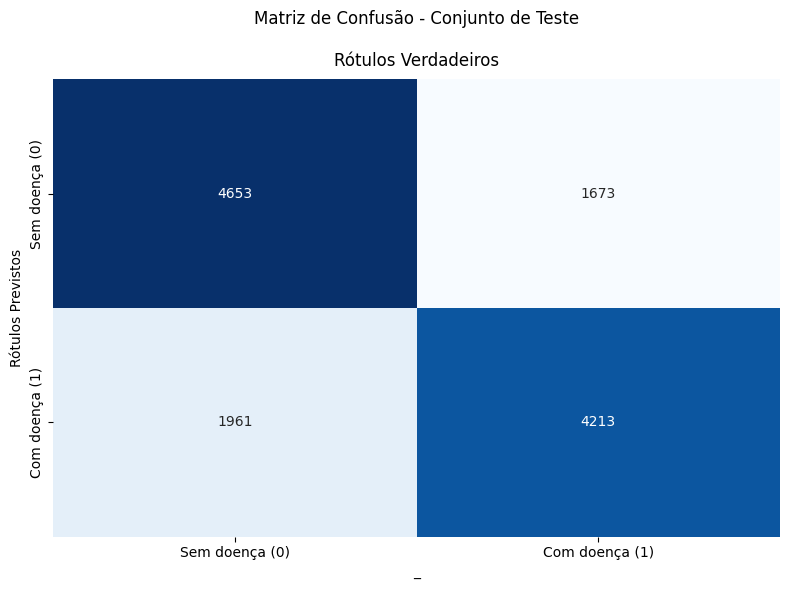

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Sem doença (0)', 'Com doença (1)'],
            yticklabels=['Sem doença (0)', 'Com doença (1)'])

plt.title('Matriz de Confusão - Conjunto de Teste\n\nRótulos Verdadeiros', pad=10)
plt.xlabel('_')
plt.ylabel('Rótulos Previstos')
plt.tight_layout()
plt.show()

Interpretação da Matriz de Confusão:

- 38 verdadeiros negativos (TN): o modelo previu sem doença (0) e a pessoa realmente não tinha doença.

- 10 falsos negativos (FN): o modelo previu com doença (1), mas a pessoa não tinha doença.

- 7 falsos positivos (FP): o modelo previu sem doença (0), mas a pessoa tinha doença.

- 35 verdadeiros positivos (TP): o modelo previu com doença (1) e a pessoa realmente tinha doença.

## Acurácia

- Mede a relação entre acerto e erro,
considerando todos os pares
- Fórmula: ACURÁCIA = TP + TN / TP + TN + FP + FN

In [ ]:
acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia: {acc*100:.2f}%")

Acurácia: 70.93%


> O modelo acerta cerca de 81,11% das previsões, o que é um desempenho sólido, porém, no contexto médico, pode mascarar erros importantes, como falsos negativos.

## Precisão

- Mede a capacidade de deixar num
mesmo grupo amostras que deveriam
estar no mesmo grupo
- Fórmula: PRECISÃO = TP / TP + FP

In [ ]:
prec = precision_score(y_test, y_pred_test)
print(f"Precisão: {prec*100:.2f}%")

Precisão: 71.58%


> Quando o modelo prevê "com doença", acerta cerca de 77,78% das vezes, um desempenho aceitável. Isso é importante para reduzir alarmes falsos (falsos positivos).

## Recall

- Mede a capacidade do modelo de identificar corretamente as
amostras positivas.
- Útil em problemas onde é mais crítico detectar a classe positiva, como diagnóstico médico.
- Fórmula: TP / TP + FN


In [ ]:
rec = recall_score(y_test, y_pred_test)
print(f"Recall: {rec*100:.2f}%")

Recall: 68.24%


> O modelo detecta corretamente cerca de 83,33% dos pacientes com doença. Uma boa sensibilidade é crucial em diagnósticos médicos, pois minimiza falsos negativos. No nosso contexto, é a métrica mais crítica.

## F1 Score

*   F1-score é a média harmônica entre precisão e sensibilidade (recall)
*   Fórmula: F1-score = 2 × (Precision × Recall) / (Precision + Recall)

In [ ]:
f1 = f1_score(y_test, y_pred_test)
print(f"F1 Score: {f1*100:.2f}%")

F1 Score: 69.87%


> Mostra o equilíbrio entre identificar corretamente os positivos e evitar falsos positivos. O desempenho de 80,46% indica um bom equilíbro.

## Especificidade

- Mede a capacidade do modelo de identificar corretamente as
amostras negativas
- Fórmula: ESPECIFICIDADE = TN / TN + FP

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
spec = tn / (tn + fp)

print(f"Especificidade: {spec*100:.2f}%")

Especificidade: 73.55%


> O modelo também acerta bem, 79,17%, na detecção de pacientes sem a doença. Isso reduz o risco de diagnósticos errados para quem está saudável (evita falsos positivos).

## Curva ROC

- É um gráfico que mostra a taxa de verdadeiros positivos (Recall) contra a taxa de falsos positivos (1 - Especificidade), para diferentes limiares de decisão.
- O AUC (Área sob a Curva ROC) mede a capacidade do modelo em distinguir entre as classes (quanto mais próximo de 1, melhor).

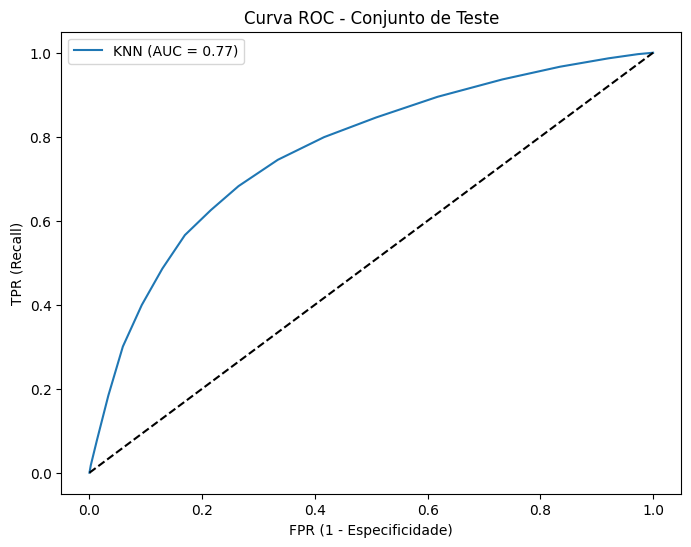

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
auc = roc_auc_score(y_test, y_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR (1 - Especificidade)')
plt.ylabel('TPR (Recall)')
plt.title('Curva ROC - Conjunto de Teste')
plt.legend()
plt.show()

> 0,86 é um valor alto que indica boa capacidade de discriminação entre doentes (positivos) e não-doentes (negativos).

## Considerações sobre o KNN no nosso dataset


Para melhor visualização da "pontuação" das métricas aplicadas, geramos um gráfico de barras

                  Métrica  Valor (%)
0                Acurácia      70.93
1                Precisão      71.58
2  Recall (Sensibilidade)      68.24
3                F1 Score      69.87
4          Especificidade      73.55
--------------------------------------


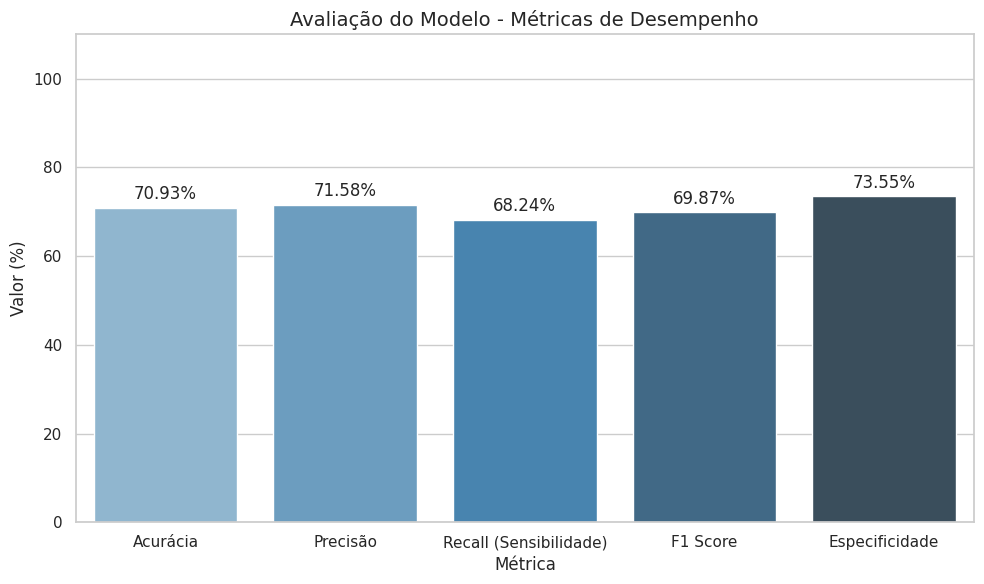

In [ ]:
# df resultadoss
results_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall (Sensibilidade)', 'F1 Score', 'Especificidade'],
    'Valor (%)': [acc * 100, prec * 100, rec * 100, f1 * 100, spec * 100]
})

# 2casas decimais
results_df['Valor (%)'] = results_df['Valor (%)'].round(2)
print(results_df)
print("--------------------------------------")

sns.set(style="whitegrid")

# GRAFICO DE BARRAS
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Métrica", y="Valor (%)", palette="Blues_d", hue="Métrica")

# LABELS DO GRAFICO
for index, row in results_df.iterrows():
    plt.text(index, row["Valor (%)"] + 1, f"{row['Valor (%)']}%", ha='center', va='bottom')

# frufru
plt.title("Avaliação do Modelo - Métricas de Desempenho", fontsize=14)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

## Teste variando métricas e peso considerado


aaaa

# MLP


sobreee
falar sobre mtos tópicos importantes

## Criando o dataframe para manipulação

Como realizamos a engenharia de variáveis e limpeza de dados em um tópico anterior, vamos copiar o dataframe em um novo exclusivo para mexermos com o KNN.

In [ ]:
df_2 = df.copy()
df_2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,60,1,151,67.0,120,80,2,2,0,0,0,0


## Modelagem

Aqui, removemos a coluna 'cardio' do Dataframe e guardamos o restante em uma variável X. Esse 'X' representa as variáveis independentes (os atributos). E para 'y', armazenamos somente a coluna 'cardio' (nosso rótulo), logo 'y'. Assim, separamos em entrada (dados clínicos dos pacientes) = X, e saída (diagnóstico de doença cardiovascular) = y.

In [ ]:
X = df_2.drop("disease", axis= 1)
y = df_2["disease"]

Separando o conjunto original em dados de treino e dados de teste. Essa divisão é importante pois garante que o modelo aprenda APENAS com os dados de treino (X_train, y_train), e seja avaliado com dados que ele nunca viu, ou seja, o conjunto de teste (X_test, y_test) -> é essencial essa separação pois os dados de treino e teste nunca devem ser misturados.
- A proporção 0.3 significa que separamos 30% dos dados para teste, os 70% restantes serão dados de treino.
- O 'random_state' garante a reprodutibilidade, pois sempre que executamos o código a divisão será a mesma, assim podemos fazer comparações consistentes.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Aqui podemos visualizar quantos dados foram separados para cada divisão

In [ ]:
print(f"Para TREINO, temos {X_train.shape[0]} amostras COM rótulo.")
print(f"Para TESTE, temos {X_test.shape[0]} amostras SEM rótulo.")

Para TREINO, temos 49999 amostras COM rótulo.
Para TESTE, temos 12500 amostras SEM rótulo.


Com o objetivo de reduzir a dimensionalidade dos dados e preservar a maior parte da variabilidade presente no conjunto original, foi utilizada a técnica de Análise de Componentes Principais (PCA). A aplicação foi restrita ao conjunto de treino para evitar data leakage.


In [ ]:
pca = PCA(n_components=0.95, whiten=True, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Número de componentes após PCA: {pca.n_components_}")

Número de componentes após PCA: 5


aaaaaaaaaaaaaaaaaaaaaaaaaaaaa


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

pipeline

In [ ]:
pipeline_MLP = Pipeline([
    ('scaler', StandardScaler()),
    # ('pca', PCA(n_components=0.95, whiten=True, random_state=42)),
    ('mlp', MLPClassifier(random_state=42, max_iter=500))
])

param grid para grid searchcv

In [ ]:
param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (100, 50), (150, 75)],
    # (26, 52, 100),
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__learning_rate': ['constant'],
    # mlp_learning_rate 0,001 , 0,01, 0,1
    'mlp__batch_size': ['auto', 64, 128]
}

o grid search em si

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline_MLP,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

treinamento

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


melhor modelo

In [ ]:
best_model = grid_search.best_estimator_

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

NameError: name 'grid_search' is not defined

predicoes p aplicar as metricas de avaliacao

In [ ]:
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# PARAMETROS PARA VARIAR:
# - learning_rate (taxa de aprendizado): 'constant', 'invscaling', 'adaptive'
# - hidden_layers_sizes (numero de camadas ocultas):
#      > exemplo: (32,32) = 2 camadas ocultas. cada uma com 32 perceptrons (neuronios)
# - batch_size (tamanho dos lotes) (numero inteiro ou 'auto'):
# - activation (funcao de ativacao): 'relu', 'identity', 'logistic', 'tanh' -> relu deve performar melhor
# - bias (viés): ????????????
# - max_iter (numero de iteracoes) (int): default=200.

mlpTESTE = MLPClassifier(
    hidden_layer_sizes= (100,50), # duas camadas ocultas: 100 neuronios na 1a e 50 na 2a
    activation='relu',
    max_iter= 300,
    learning_rate= 'adaptive',
    batch_size= 'auto',
    random_state=42)


# outros parametros:
# - solver,
# - random_state!!




# Avaliação da aplicaçaõ de MLP

Em machine learning, temos diversos critérios de avaliação, com o objetivo de mensurar a eficácia e a generalização dos modelos para garantir que eles funcionem bem não apenas nos dados de treinamento, mas também em dados novos ou não vistos. Esses critérios ajudam a quantificar o desempenho do modelo em diferentes aspectos que abordaremos a seguir: Matriz de confusão, Acurácia, Precisão, Sensibilidade (Recall), Curva ROC, F1-Score.

Além disso, esses critérios auxiliam na comparação entre diferentes modelos e abordagens, orientando a escolha da melhor solução para o problema específico

Anteriormente, fizemos a implementação de MLP, um algoritmo de classificação. Nessa parte do trabalho, usaremos os critérios externos de avaliação mencionados para medir a performance do modelo aplicado e compreender sua eficácia em diferentes situações.


## Matriz de Confusão

- É uma tabela que resume o desempenho de um modelo de classificação, comparando os valores previstos com os reais.
- É especialmente útil para avaliar erros de falso-positivo e falso-negativo

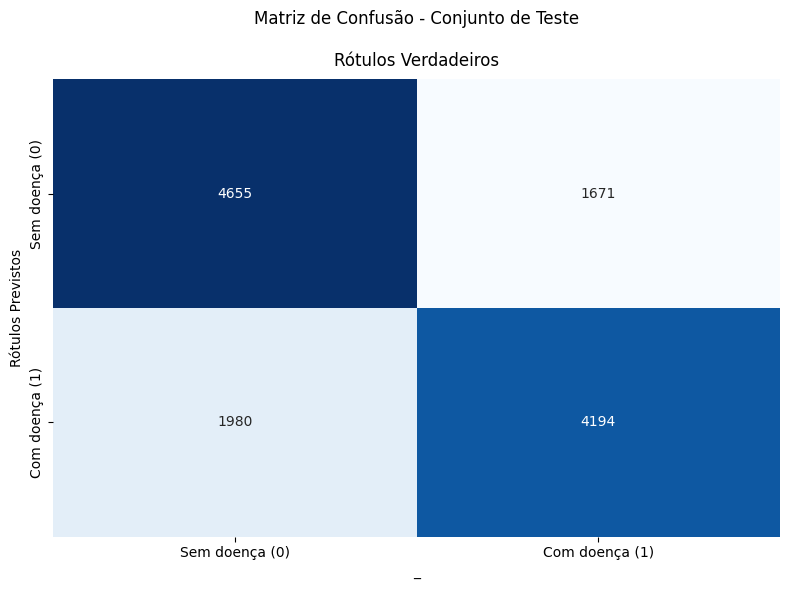

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Sem doença (0)', 'Com doença (1)'],
            yticklabels=['Sem doença (0)', 'Com doença (1)'])

plt.title('Matriz de Confusão - Conjunto de Teste\n\nRótulos Verdadeiros', pad=10)
plt.xlabel('_')
plt.ylabel('Rótulos Previstos')
plt.tight_layout()
plt.show()

Interpretação da Matriz de Confusão:

- 38 verdadeiros negativos (TN): o modelo previu sem doença (0) e a pessoa realmente não tinha doença.

- 10 falsos negativos (FN): o modelo previu com doença (1), mas a pessoa não tinha doença.

- 7 falsos positivos (FP): o modelo previu sem doença (0), mas a pessoa tinha doença.

- 35 verdadeiros positivos (TP): o modelo previu com doença (1) e a pessoa realmente tinha doença.

## Acurácia

- Mede a relação entre acerto e erro,
considerando todos os pares
- Fórmula: ACURÁCIA = TP + TN / TP + TN + FP + FN

In [ ]:
acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia: {acc*100:.2f}%")

Acurácia: 70.79%


> O modelo acerta cerca de 81,11% das previsões, o que é um desempenho sólido, porém, no contexto médico, pode mascarar erros importantes, como falsos negativos.

## Precisão

- Mede a capacidade de deixar num
mesmo grupo amostras que deveriam
estar no mesmo grupo
- Fórmula: PRECISÃO = TP / TP + FP

In [ ]:
prec = precision_score(y_test, y_pred_test)
print(f"Precisão: {prec*100:.2f}%")

Precisão: 71.51%


> Quando o modelo prevê "com doença", acerta cerca de 77,78% das vezes, um desempenho aceitável. Isso é importante para reduzir alarmes falsos (falsos positivos).

## Recall

- Mede a capacidade do modelo de identificar corretamente as
amostras positivas.
- Útil em problemas onde é mais crítico detectar a classe positiva, como diagnóstico médico.
- Fórmula: TP / TP + FN


In [ ]:
rec = recall_score(y_test, y_pred_test)
print(f"Recall: {rec*100:.2f}%")

Recall: 67.93%


> O modelo detecta corretamente cerca de 83,33% dos pacientes com doença. Uma boa sensibilidade é crucial em diagnósticos médicos, pois minimiza falsos negativos. No nosso contexto, é a métrica mais crítica.

## F1-Score

*   F1-score é a média harmônica entre precisão e sensibilidade (recall)
*   Fórmula: F1-score = 2 × (Precision × Recall) / (Precision + Recall)

In [ ]:
f1 = f1_score(y_test, y_pred_test)
print(f"F1 Score: {f1*100:.2f}%")

F1 Score: 69.67%


> Mostra o equilíbrio entre identificar corretamente os positivos e evitar falsos positivos. O desempenho de 80,46% indica um bom equilíbro.

## Especificidade

- Mede a capacidade do modelo de identificar corretamente as
amostras negativas
- Fórmula: ESPECIFICIDADE = TN / TN + FP

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
spec = tn / (tn + fp)

print(f"Especificidade: {spec*100:.2f}%")

Especificidade: 73.59%


> O modelo também acerta bem, 79,17%, na detecção de pacientes sem a doença. Isso reduz o risco de diagnósticos errados para quem está saudável (evita falsos positivos).

## Curva ROC

- É um gráfico que mostra a taxa de verdadeiros positivos (Recall) contra a taxa de falsos positivos (1 - Especificidade), para diferentes limiares de decisão.
- O AUC (Área sob a Curva ROC) mede a capacidade do modelo em distinguir entre as classes (quanto mais próximo de 1, melhor).

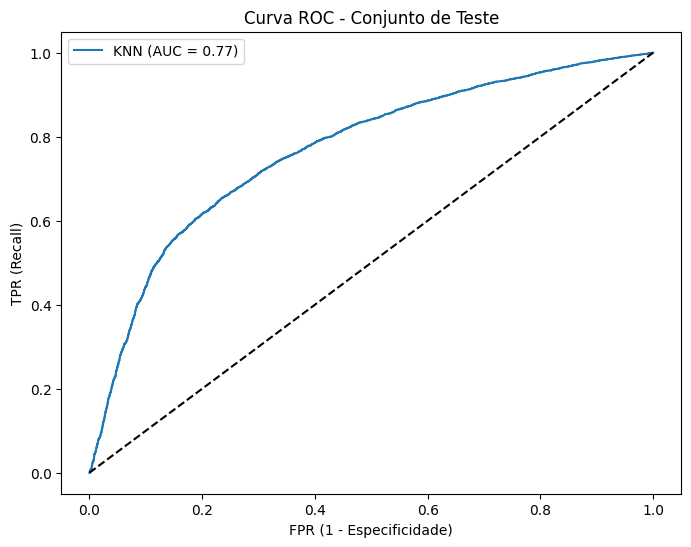

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
auc = roc_auc_score(y_test, y_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR (1 - Especificidade)')
plt.ylabel('TPR (Recall)')
plt.title('Curva ROC - Conjunto de Teste')
plt.legend()
plt.show()

> 0,86 é um valor alto que indica boa capacidade de discriminação entre doentes (positivos) e não-doentes (negativos).

## Considerações sobre MLP no nosso dataset

Para melhor visualização da "pontuação" das métricas aplicadas, geramos um gráfico de barras

                  Métrica  Valor (%)
0                Acurácia      70.79
1                Precisão      71.51
2  Recall (Sensibilidade)      67.93
3                F1 Score      69.67
4          Especificidade      73.59
--------------------------------------


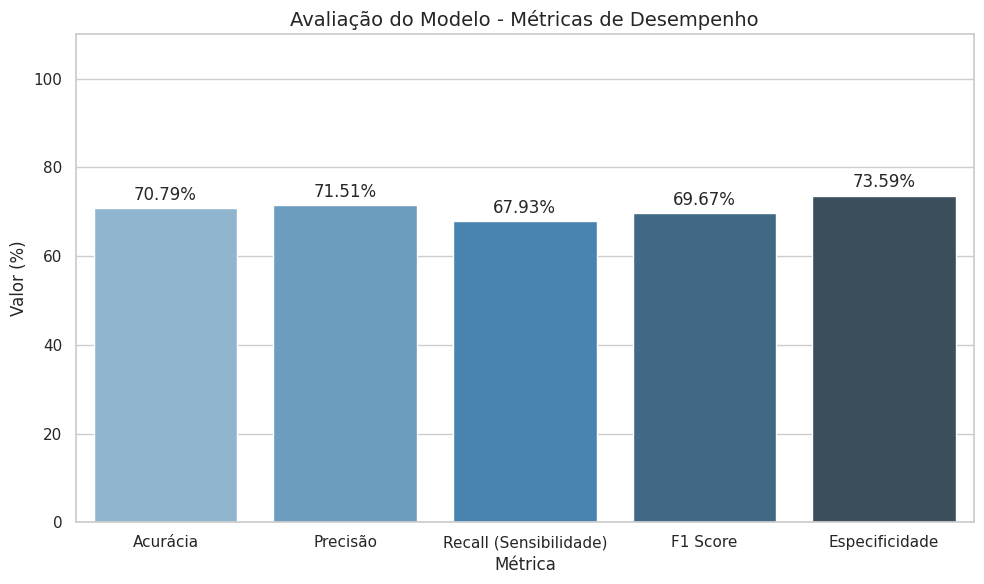

In [ ]:
# df resultadoss
results_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall (Sensibilidade)', 'F1 Score', 'Especificidade'],
    'Valor (%)': [acc * 100, prec * 100, rec * 100, f1 * 100, spec * 100]
})

# 2casas decimais
results_df['Valor (%)'] = results_df['Valor (%)'].round(2)
print(results_df)
print("--------------------------------------")

sns.set(style="whitegrid")

# GRAFICO DE BARRAS
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Métrica", y="Valor (%)", palette="Blues_d", hue="Métrica")

# LABELS DO GRAFICO
for index, row in results_df.iterrows():
    plt.text(index, row["Valor (%)"] + 1, f"{row['Valor (%)']}%", ha='center', va='bottom')

# frufru
plt.title("Avaliação do Modelo - Métricas de Desempenho", fontsize=14)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()